# Cyclone - AXA Climate, CS

Version Erwin
____________

In [83]:
#!wget https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.NA.list.v04r00.csv

In [84]:
#!pip install geodatasets

In [85]:
import warnings
warnings.filterwarnings("ignore")



<h1><b>1. Lecture du CSV</b></h1>

In [86]:
import pandas as pd
from geodatasets import get_path
import geopandas

In [87]:
df = pd.read_csv("ibtracs.NA.list.v04r00.csv", delimiter=',', dtype=str, keep_default_na=False)

In [88]:
df

SID SEASON NUMBER BASIN SUBBASIN       NAME  \
0                       Year                                    
1       1851175N26270   1851      5    NA       GM  NOT_NAMED   
2       1851175N26270   1851      5    NA       GM  NOT_NAMED   
3       1851175N26270   1851      5    NA       GM  NOT_NAMED   
4       1851175N26270   1851      5    NA       GM  NOT_NAMED   
...               ...    ...    ...   ...      ...        ...   
127167  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127168  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127169  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127170  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127171  2023319N11282   2023     80    NA       CS  NOT_NAMED   

                   ISO_TIME NATURE            LAT           LON  ...  \
0                                   degrees_north  degrees_east  ...   
1       1851-06-23 12:00:00     TS        26.1000      -90.4000  ...   
2       1851-06-23 15:00:00     TS        26.2001      -90.6999  ...   
3       1851-06-23 18:00:00     TS        26.3000      -91.0000  ...   
4       1851-06-23 21:00:00     TS        26.3999      -91.3001  ...   
...                     ...    ...            ...           ...  ...   
127167  2023-11-17 12:00:00     NR        17.0364      -79.8000  ...   
127168  2023-11-17 15:00:00     NR        17.4991      -79.1718  ...   
127169  2023-11-17 18:00:00     NR        18.0000      -78.5000  ...   
127170  2023-11-17 21:00:00     NR        18.6166      -77.8437  ...   
127171  2023-11-18 00:00:00     NR        19.3000      -77.2000  ...   

       BOM_GUST_PER REUNION_GUST REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE  \
0            second          kts           second         ft         nmile   
1                                                                            
2                                                                            
3                                                                            
4                                                                            
...             ...          ...              ...        ...           ...   
127167                                                                       
127168                                                                       
127169                                                    12                 
127170                                                                       
127171                                                                       

       USA_SEARAD_SE USA_SEARAD_SW USA_SEARAD_NW STORM_SPEED STORM_DIR  
0              nmile         nmile         nmile         kts   degrees  
1                                                          6       291  
2                                                          6       290  
3                                                          6       290  
4                                                          6       290  
...              ...           ...           ...         ...       ...  
127167                                                    15        49  
127168                                                    16        52  
127169           120                                      17        49  
127170                                                    18        43  
127171                                                    18        42  

[127172 rows x 163 columns]

On peut enlever la première ligne

In [89]:
df = df.drop(0, axis=0)

Enfin, on peut convertir les latitudes et longitudes en flottant, et les dates en datetime :

In [90]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df['LAT'] = df['LAT'].astype(float)
df['LON'] = df['LON'].astype(float)

On se concentre sur le bassin nord atlantique :

In [91]:
df['BASIN'].value_counts()

BASIN
NA    126593
EP       512
NI        66
Name: count, dtype: int64

In [92]:
df = df[(df['BASIN'] == 'NA')]

On prend uniquement les données à partir des années 1970

In [93]:
df = df[df['ISO_TIME'] > pd.Timestamp('1970-01-01 00:00:00')]

In [94]:
df

SID SEASON NUMBER BASIN SUBBASIN       NAME  \
78433   1970138N12281   1970     43    NA       CS       ALMA   
78434   1970138N12281   1970     43    NA       CS       ALMA   
78435   1970138N12281   1970     43    NA       CS       ALMA   
78436   1970138N12281   1970     43    NA       CS       ALMA   
78437   1970138N12281   1970     43    NA       CS       ALMA   
...               ...    ...    ...   ...      ...        ...   
127167  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127168  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127169  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127170  2023319N11282   2023     80    NA       CS  NOT_NAMED   
127171  2023319N11282   2023     80    NA       CS  NOT_NAMED   

                  ISO_TIME NATURE      LAT      LON  ... BOM_GUST_PER  \
78433  1970-05-17 18:00:00     TS  11.5000 -79.0000  ...                
78434  1970-05-17 21:00:00     TS  11.6475 -79.1400  ...                
78435  1970-05-18 00:00:00     TS  11.8000 -79.3000  ...                
78436  1970-05-18 03:00:00     TS  11.9575 -79.4925  ...                
78437  1970-05-18 06:00:00     TS  12.1000 -79.7000  ...                
...                    ...    ...      ...      ...  ...          ...   
127167 2023-11-17 12:00:00     NR  17.0364 -79.8000  ...                
127168 2023-11-17 15:00:00     NR  17.4991 -79.1718  ...                
127169 2023-11-17 18:00:00     NR  18.0000 -78.5000  ...                
127170 2023-11-17 21:00:00     NR  18.6166 -77.8437  ...                
127171 2023-11-18 00:00:00     NR  19.3000 -77.2000  ...                

       REUNION_GUST REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE  \
78433                                                                         
78434                                                                         
78435                                                                         
78436                                                                         
78437                                                                         
...             ...              ...        ...           ...           ...   
127167                                                                        
127168                                                                        
127169                                       12                         120   
127170                                                                        
127171                                                                        

       USA_SEARAD_SW USA_SEARAD_NW STORM_SPEED STORM_DIR  
78433                                        4       317  
78434                                        4       316  
78435                                        5       312  
78436                                        5       308  
78437                                        5       301  
...              ...           ...         ...       ...  
127167                                      15        49  
127168                                      16        52  
127169                                      17        49  
127170                                      18        43  
127171                                      18        42  

[48355 rows x 163 columns]

Trions par SID, puis ISO_TIME

In [95]:
df = df.sort_values(by=['SID', 'ISO_TIME'])
df = df.reset_index(drop=True)

In [96]:
df

SID SEASON NUMBER BASIN SUBBASIN       NAME  \
0      1970138N12281   1970     43    NA       CS       ALMA   
1      1970138N12281   1970     43    NA       CS       ALMA   
2      1970138N12281   1970     43    NA       CS       ALMA   
3      1970138N12281   1970     43    NA       CS       ALMA   
4      1970138N12281   1970     43    NA       CS       ALMA   
...              ...    ...    ...   ...      ...        ...   
48350  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48351  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48352  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48353  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48354  2023319N11282   2023     80    NA       CS  NOT_NAMED   

                 ISO_TIME NATURE      LAT      LON  ... BOM_GUST_PER  \
0     1970-05-17 18:00:00     TS  11.5000 -79.0000  ...                
1     1970-05-17 21:00:00     TS  11.6475 -79.1400  ...                
2     1970-05-18 00:00:00     TS  11.8000 -79.3000  ...                
3     1970-05-18 03:00:00     TS  11.9575 -79.4925  ...                
4     1970-05-18 06:00:00     TS  12.1000 -79.7000  ...                
...                   ...    ...      ...      ...  ...          ...   
48350 2023-11-17 12:00:00     NR  17.0364 -79.8000  ...                
48351 2023-11-17 15:00:00     NR  17.4991 -79.1718  ...                
48352 2023-11-17 18:00:00     NR  18.0000 -78.5000  ...                
48353 2023-11-17 21:00:00     NR  18.6166 -77.8437  ...                
48354 2023-11-18 00:00:00     NR  19.3000 -77.2000  ...                

      REUNION_GUST REUNION_GUST_PER USA_SEAHGT USA_SEARAD_NE USA_SEARAD_SE  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
...            ...              ...        ...           ...           ...   
48350                                                                        
48351                                                                        
48352                                       12                         120   
48353                                                                        
48354                                                                        

      USA_SEARAD_SW USA_SEARAD_NW STORM_SPEED STORM_DIR  
0                                           4       317  
1                                           4       316  
2                                           5       312  
3                                           5       308  
4                                           5       301  
...             ...           ...         ...       ...  
48350                                      15        49  
48351                                      16        52  
48352                                      17        49  
48353                                      18        43  
48354                                      18        42  

[48355 rows x 163 columns]

Utile pour la suite : on calcule la différence de temps entre une ligne et la ligne précédente, à condition que le SID soit identique

In [97]:
df['TIME_DIFF'] = df.groupby('SID')['ISO_TIME'].diff()

La plupart du temps, la différence est de 3 heures

_________________________________

<h1><b>2. Initiation d'un cyclone</b></h1>

On veut déterminer la probabilité qu'un point `(x, y)` soit l'origine d'un cyclone

## 2.1 - Grille

L’objectif est de créer une grille de résolution 5° × 5°, et de compter le nombre de cyclones historiques qui ont débuté dans chaque cellule de la grille.

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from sklearn.neighbors import NearestNeighbors
import folium
from folium.raster_layers import ImageOverlay

Utile pour la suite : on va créer deux variables globales `RESOLUTIONS` et `BINS` qui vont contenir les résolutions et les bins de toutes les variables qu'on aura discrétisé.

In [99]:
RESOLUTIONS = dict()
BINS = dict()

In [100]:
def getBins(data, resolution):
    """
    Retourne un tableau numpy contenant les bins, pour une résolution donnée
    """
    return np.arange(data.min(), data.max()+resolution, resolution)

In [101]:
def getAssignedBins(data, bins):
    """
    Retourne un dataframe contenant les identifiants des bins associés à chaque donnée.
    Chaque donnée x est associée au bin i si x[bin_i] < x <= x[bin_i+1]
    Exception lorsque x = x[bin_0], où dans ce cas, le bin associé est 0.
    """
    return pd.cut(data, bins=bins, labels=range(len(bins)-1), include_lowest=True)

In [102]:
def createBins(name, resolution):
    """
    Discrétise les valeurs de la colonne 'name' du df, selon une résolution
    Stocke le résultat dans les variables RESOLUTIONS et BINS
    Créé une nouvelle colonne dans df
    """
    global df
    global RESOLUTIONS
    global BINS

    bins = getBins(df[name], resolution)
    df[f'{name}_bin'] = getAssignedBins(df[name], bins)

    BINS[name] = bins
    RESOLUTIONS[name] = resolution

On créé les bins pour LAT et LON. Les résultats sont stockés dans df, BINS, et RESOLUTIONS

In [103]:
createBins('LAT', 5)
createBins('LON', 5)

In [104]:
def getHist2D(x, y, normalize=True):
    """
    Pour des paires d'entiers stockées dans les colonnes x et y, retourne un histogram 2D, normalisée à 1.
    """
    data = pd.DataFrame({'x': x, 'y': y})

    # On compte toutes les paires de valeurs présentes
    pair_counts = data.groupby(['x', 'y']).size().reset_index(name='Count')

    # On utilise la fonction pivot de pandas qui créé un tableau à partir de ces paires
    pivot_df = pair_counts.pivot(index='x', columns='y', values='Count')
    pivot_df = pivot_df.fillna(0)

    hist = pivot_df.to_numpy().astype(float)

    if normalize:
        hist /= np.sum(hist)

    return hist


In [105]:
from folium.plugins import HeatMap

def plotHistFolium(hist, radius):

    map_center = [10, -70]  # Change coordinates as needed
    mymap = folium.Map(location=map_center, zoom_start=3)

    """
    data = []
    for iLat in range(hist.shape[0]):
        for iLon in range(hist.shape[1]):
            lat = (lat_edges[iLat] + lat_edges[iLat+1])/2
            lon = (lon_edges[iLon] + lon_edges[iLon+1])/2
            weight = hist[iLat, iLon]
            data.append([lat, lon, weight*10])

    heatmap_layer = HeatMap(data=np.array(data), min_opacity=0.2,radius=20)"""

    heatmap_layer = HeatMap(data=hist, min_opacity=0.2,radius=radius, use_local_extrema=False)
    # Add the heatmap layer to the map
    mymap.add_child(heatmap_layer)
    return mymap

In [106]:
def plotHist(hist, lat_edges=BINS['LAT'], lon_edges=BINS['LON'], title="Original Graph", interpolate=False):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))

    #world = geopandas.read_file(get_path("naturalearth.land"))

    # and test our libraries loaded

    #world.plot(ax=axs, color='none', edgecolor='black')

    if interpolate:
        plt.imshow(hist, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet, interpolation='gaussian')
    else:
        plt.imshow(hist, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet)
    axs.set_title(title)
    axs.set_ylabel('latitude (°)')
    axs.set_xlabel('longitude (°)')


    plt.colorbar()
    plt.show()

In [107]:
# Find index of minimum time for each group
idx_begin = df.groupby('SID')['ISO_TIME'].idxmin()
df_begins = df.loc[idx_begin, ['SID', 'ISO_TIME', 'LAT', 'LON', 'LAT_bin', 'LON_bin']]

In [108]:
df_begins

SID            ISO_TIME   LAT   LON LAT_bin LON_bin
0      1970138N12281 1970-05-17 18:00:00  11.5 -79.0       0       5
75     1970200N19277 1970-07-19 00:00:00  18.5 -83.5       2       4
113    1970210N34285 1970-07-28 18:00:00  34.2 -74.8       5       6
146    1970212N18278 1970-07-31 00:00:00  18.5 -82.5       2       5
193    1970215N14342 1970-08-02 12:00:00  14.0 -18.0       1      17
...              ...                 ...   ...   ...     ...     ...
48012  2023267N11338 2023-09-23 18:00:00  10.5 -21.9       0      17
48079  2023280N09346 2023-10-07 06:00:00   8.6 -14.0       0      18
48150  2023284N10343 2023-10-10 12:00:00   9.5 -16.7       0      18
48301  2023294N10279 2023-10-21 06:00:00  10.4 -80.8       0       5
48328  2023319N11282 2023-11-14 18:00:00  10.9 -78.1       0       5

[915 rows x 6 columns]

In [109]:
hist = getHist2D(df_begins['LAT_bin'], df_begins['LON_bin'])

In [110]:
hist.shape

(13, 25)

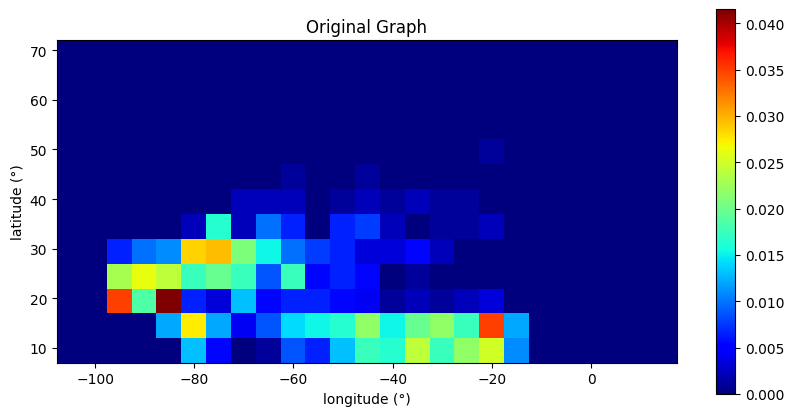

In [111]:
plotHist(hist)

## 2.2 - Kernel Gaussien

Dans un second temps, on utilisera un Kernel Gaussien, avec une largeur de bande
de 1° en latitude et longitude, afin de lisser cette estimation.

In [112]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def getHistKDE(LAT, LON, sigma = 1):

    values = np.vstack([LAT, LON])
    kernel = gaussian_kde(values, sigma)

    bin_lat = BINS['LAT']
    bin_lon = BINS['LON']

    hist = np.zeros((len(bin_lat)-1, len(bin_lon)-1))
    for iLat in range(hist.shape[0]):
        for iLon in range(hist.shape[1]):
            lat = bin_lat[iLat] + RESOLUTIONS['LAT'] / 2
            lon = bin_lon[iLon] + RESOLUTIONS['LON'] / 2
            hist[iLat, iLon] = kernel([lat, lon])

    hist /= np.sum(hist)
    return hist


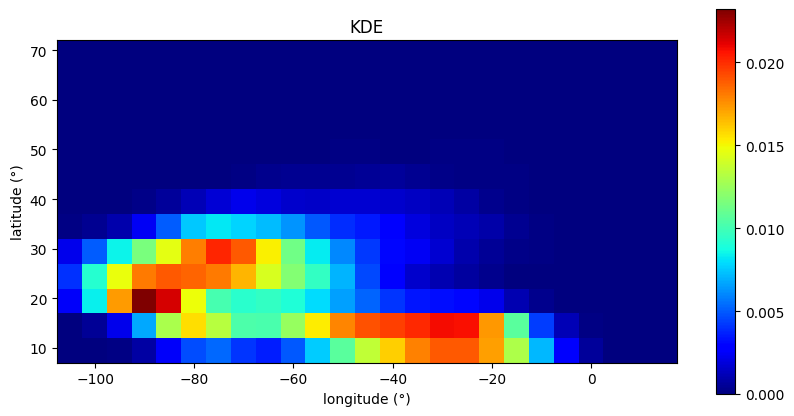

In [113]:
hist = getHistKDE(df_begins['LAT'], df_begins['LON'], 0.3)
plotHist(hist, title="KDE")

Celui la il est bien

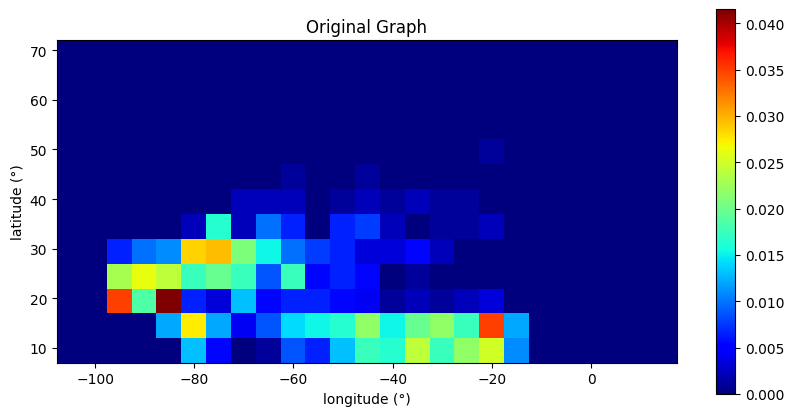

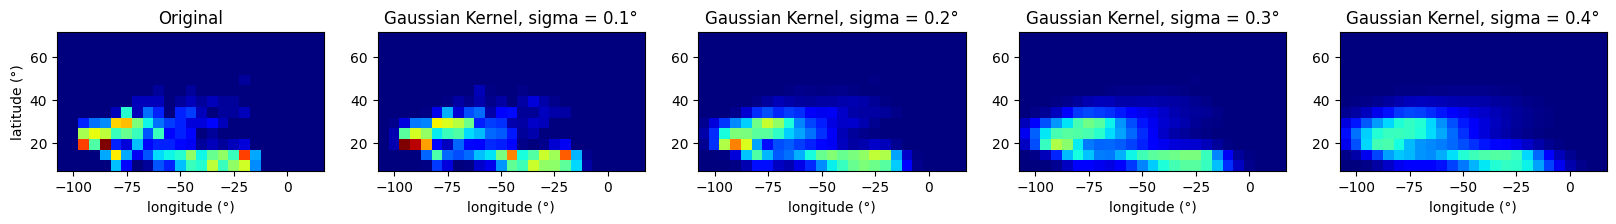

In [114]:
hist = getHist2D(df_begins['LAT_bin'], df_begins['LON_bin'])
plotHist(hist)

lon_edges = BINS['LON']
lat_edges = BINS['LAT']

#world = geopandas.read_file(get_path("naturalearth.land"))

vmax = hist.max()
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

#world.plot(ax=axs[0], color='none', edgecolor='black')
axs[0].imshow(hist, vmin=0, vmax=vmax, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet)
axs[0].set_title(f'Original', fontsize=12)
axs[0].set_ylabel('latitude (°)')
axs[0].set_xlabel('longitude (°)')

sigmas = {
    1: 0.1,
    2: 0.2,
    3: 0.3,
    4: 0.4
}

for i in range(1,5):
    #world.plot(ax=axs[i], color='none', edgecolor='black')
    histKDE = getHistKDE(df_begins['LAT'], df_begins['LON'], sigma=sigmas[i])
    axs[i].imshow(histKDE, vmin=0, vmax=vmax, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet)
    axs[i].set_title(f'Gaussian Kernel, sigma = {sigmas[i]}°', fontsize=12)
    axs[i].set_xlabel('longitude (°)')

plt.show()

On constate que `sigma = 0.2` ou `0.3` semble être un bon compromis

In [ ]:
import folium
from folium import plugins

# Create a Folium map
map_osm = folium.Map(location=[30, -55], zoom_start=3)
locations = np.column_stack((df_begins['LAT'], df_begins['LON']))
heatmap = plugins.HeatMap(locations, gradient={.5:'blue', .7:'yellow', .95:'orange', 1:'red'})
heatmap.add_to(map_osm)
# Display the map
map_osm

## 2.3 - Bonus

In [115]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def getHistKDE_Bonus(LAT, LON, N, prop=1):

    neigh = NearestNeighbors(n_neighbors=N)
    coords = np.stack([LAT, LON], axis=1)
    neigh.fit(coords)

    values = np.vstack([LAT, LON])

    kernel = gaussian_kde(values)

    bin_lat, bin_lon = BINS['LAT'], BINS['LON']

    hist = np.zeros((len(bin_lat)-1, len(bin_lon)-1))
    for iLat in range(hist.shape[0]):
        for iLon in range(hist.shape[1]):
            lat = bin_lat[iLat] + RESOLUTIONS['LAT'] / 2
            lon = bin_lon[iLon] + RESOLUTIONS['LON'] / 2

            dists, indices = neigh.kneighbors([[lat, lon]])
            max_dist = 0
            for i in indices[0]:
                max_dist = max(max_dist, abs(coords[i][0]-lat))
                max_dist = max(max_dist, abs(coords[i][1]-lon))

            sigma = 2*max_dist*prop
            sigma = min(sigma, 15)
            sigma = max(sigma, 0.3)

            kernel.set_bandwidth(sigma)

            hist[iLat, iLon] = kernel([lat, lon])

    hist /= np.sum(hist)

    return hist


In [116]:
hist = getHistKDE_Bonus(df_begins['LAT'], df_begins['LON'], N=2, prop=1)

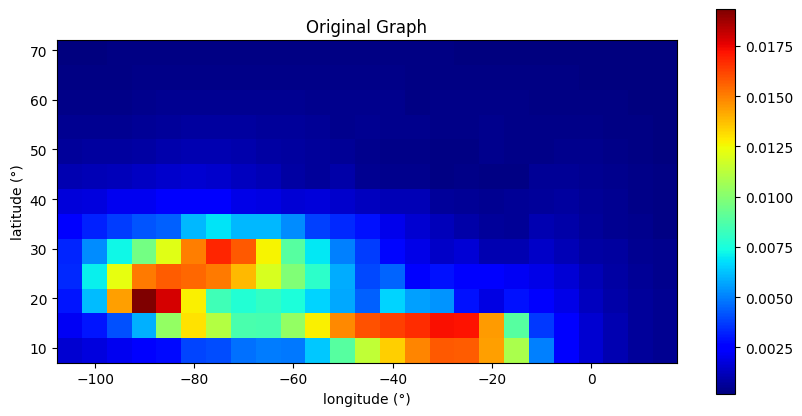

In [117]:
hist = getHistKDE_Bonus(df_begins['LAT'], df_begins['LON'], N=2, prop=0.1)
plotHist(hist)

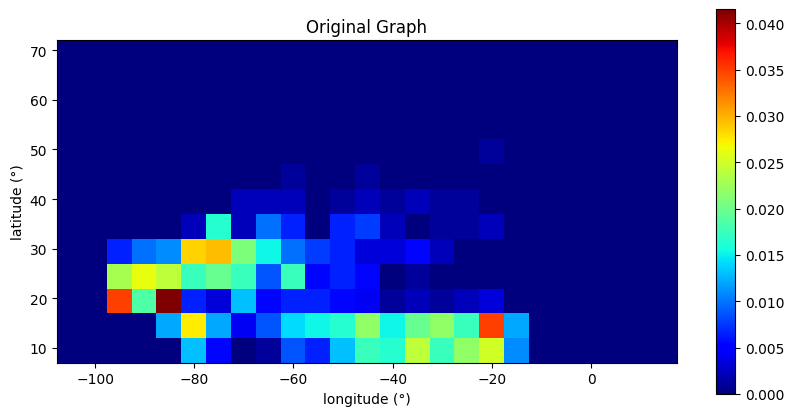

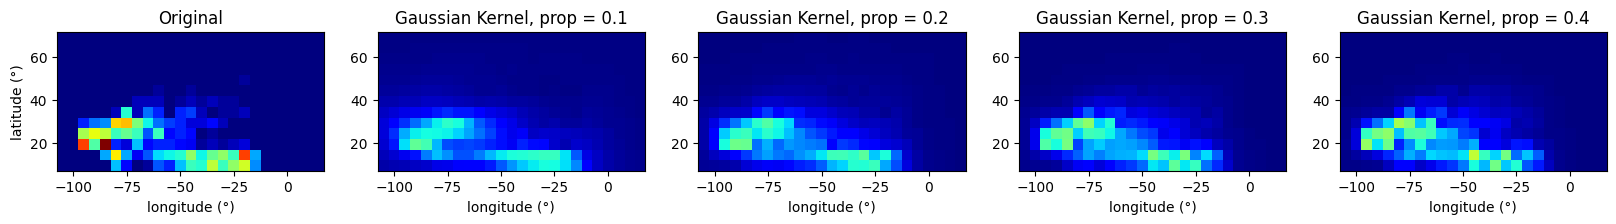

In [118]:
hist = getHist2D(df_begins['LAT_bin'], df_begins['LON_bin'])
plotHist(hist)

lon_edges = BINS['LON']
lat_edges = BINS['LAT']

#world = geopandas.read_file(get_path("naturalearth.land"))

vmax = hist.max()
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

#world.plot(ax=axs[0], color='none', edgecolor='black')
axs[0].imshow(hist, vmin=0, vmax=vmax, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet)
axs[0].set_title(f'Original', fontsize=12)
axs[0].set_ylabel('latitude (°)')
axs[0].set_xlabel('longitude (°)')

props = {
    1: 0.1,
    2: 0.2,
    3: 0.3,
    4: 0.4
}

for i in range(1,5):
    #world.plot(ax=axs[i], color='none', edgecolor='black')
    histKDE = getHistKDE_Bonus(df_begins['LAT'], df_begins['LON'], N=2, prop=props[i])
    axs[i].imshow(histKDE, vmin=0, vmax=vmax, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], cmap=plt.cm.jet)
    axs[i].set_title(f'Gaussian Kernel, prop = {props[i]}', fontsize=12)
    axs[i].set_xlabel('longitude (°)')

plt.show()

On constate que `prop = 0.1` ou `0.2` semble être un bon compromis

_______________________

<h1><b>3. Propagation d’un cyclone</b></h1>

Intuitivement, on peut supposer qu’une bonne variable d’état est la position $(x_i, y_i)$ où $x_i$ est
la latitude du point $i$ d’une trajectoire, et $y_i$ sa longitude. Ainsi, on pourrait écrire la matrice
de transition comme $P(x_i, y_i | x_{i-1}, y_{i-1})$. A partir d’éléments qualitatifs et de la
bibliographie, justiﬁer pourquoi ce choix n’est pas judicieux.

> Si on utilise $x_i$ et $y_i$ comme variable d'état, le risque est de ne pas avoir assez de données pour que ces probabilités soient représentatives

> De plus, on ne prend pas en compte suffisament la dynamique du cyclone (mais uniquement sa position précédente)

Les auteurs de [2] proposent plutôt d’étudier $(S_i, \theta_i)$ comme variable d’état dans un premier
temps, où $S_i$ est la vitesse de propagation du cyclone et $\theta_i$ son angle de propagation. Justiﬁer
pourquoi ce choix est équivalent au choix initial $(x_i, y_i)$.

> $(S_i, \theta_i)$ peuvent être obtenus en dérivant $(x_i, y_i)$.

> $(x_i, y_i)$ peuvent être obtenus en intégrant $(S_i, \theta_i)$ (la position initiale du cyclone est une donnée du problème)

Tracer à partir de la base de données à disposition, la relation $P(S_i | S_{i-1})$ $P(\theta_i | \theta_{i-1})$. On pourra pour
cela discrétiser les vitesses $S_i$ et $\theta_i$ en blocs.

In [119]:
import seaborn as sns

On utilise `STORM_SPEED` (en km/h) pour $S_i$, et `STORM_DIR` (en degrés) pour $\theta_i$.

In [120]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df['STORM_SPEED'] = df['STORM_SPEED'].astype(float) * 1.852
df['STORM_DIR'] = df['STORM_DIR'].astype(int)

<Axes: xlabel='STORM_SPEED', ylabel='Count'>

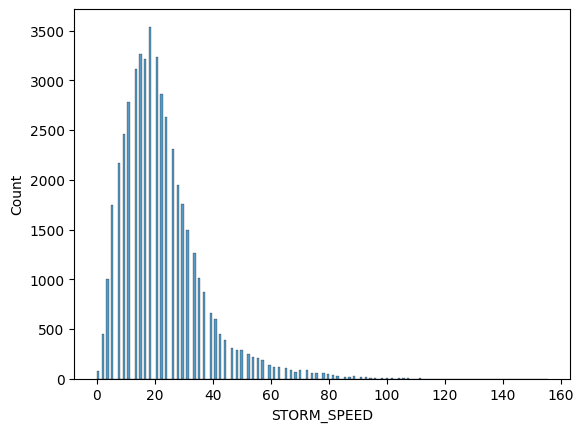

In [121]:
sns.histplot(df, x='STORM_SPEED')

<Axes: xlabel='STORM_DIR', ylabel='Count'>

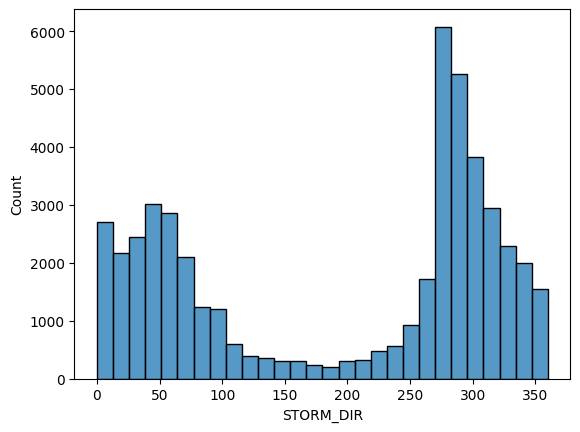

In [122]:
sns.histplot(df, x='STORM_DIR')

On doit mettre l'angle entre -180 et 180, avec 0° à l'est.

In [123]:
df['STORM_DIR'] = df['STORM_DIR'] + 90

In [124]:
df.loc[df['STORM_DIR'] > 180, 'STORM_DIR'] = df.loc[df['STORM_DIR'] > 180, 'STORM_DIR'] - 360

<Axes: xlabel='STORM_DIR', ylabel='Count'>

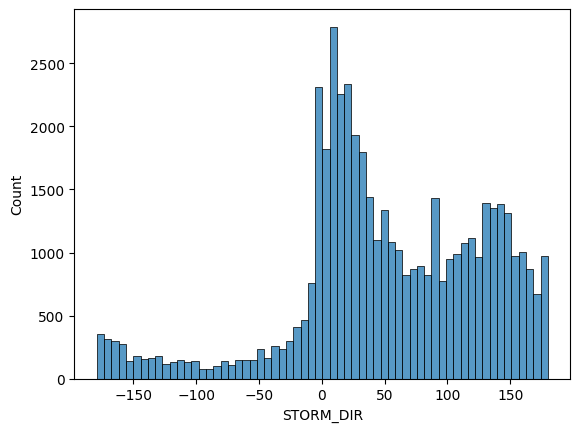

In [125]:
sns.histplot(df, x='STORM_DIR')

Regroupons par paquet :

In [126]:
createBins('STORM_SPEED', 2)
createBins('STORM_DIR', 5)

Calculons les matrices de transitions.

Version 1 - de façon iterative

In [127]:
speed_trans = np.zeros((len(BINS['STORM_SPEED'])-1, len(BINS['STORM_SPEED'])-1))
dir_trans = np.zeros((len(BINS['STORM_DIR'])-1, len(BINS['STORM_DIR'])-1))

for indexBefore, rowBefore in df.iterrows():
    timeAfter = rowBefore['ISO_TIME'] + pd.DateOffset(hours=3)
    indexAfter = indexBefore+1
    if indexAfter >= len(df):
        continue
    rowAfter = df.iloc[indexAfter]
    if rowAfter['SID'] != rowBefore['SID']:
        continue
    if rowAfter['ISO_TIME'] != timeAfter:
        continue

    speed_trans[rowAfter['STORM_SPEED_bin'], rowBefore['STORM_SPEED_bin']] += 1
    dir_trans[rowAfter['STORM_DIR_bin'], rowBefore['STORM_DIR_bin']] += 1


In [128]:
for data in [speed_trans, dir_trans]:
    for iBefore in range(len(data)):
        sum = np.sum(data[:,iBefore])
        if sum == 0:
            sum = 1
        data[:,iBefore] /= sum

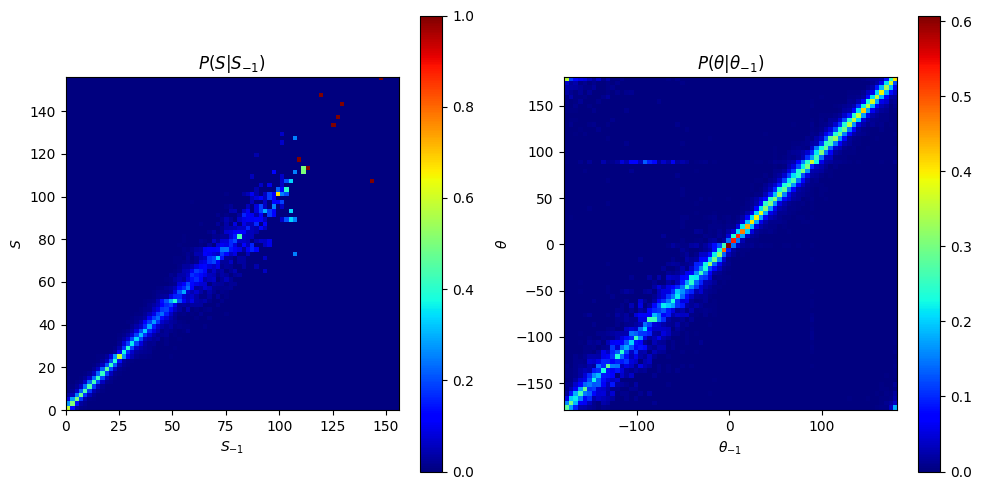

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].imshow(speed_trans, origin='lower', extent=[BINS['STORM_SPEED'][0], BINS['STORM_SPEED'][-1], BINS['STORM_SPEED'][0], BINS['STORM_SPEED'][-1]], cmap=plt.cm.jet)
axs[0].set_title("$P(S | S_{-1})$")
axs[0].set_xlabel('$S_{-1}$')
axs[0].set_ylabel('$S$')

im2 = axs[1].imshow(dir_trans, origin='lower', extent=[BINS['STORM_DIR'][0], BINS['STORM_DIR'][-1], BINS['STORM_DIR'][0], BINS['STORM_DIR'][-1]], cmap=plt.cm.jet)
axs[1].set_title("$P(\\theta | \\theta_{-1})$")
axs[1].set_xlabel('$\\theta_{-1}$')
axs[1].set_ylabel('$\\theta$')


fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
plt.tight_layout()
plt.show()

Version 2 - de façon matricielle

In [130]:
# On ajoute des nouvelles colonnes, qui contiennent la valeur de la ligne juste avant
df_only3h = df.copy()
df_only3h['STORM_SPEED_bin_before'] = df_only3h['STORM_SPEED_bin'].shift(1)
df_only3h['STORM_DIR_bin_before'] = df_only3h['STORM_DIR_bin'].shift(1)

# On ne garde que les lignes où TIME_DIFF == 3 heures, ce qui est le cas ssi la différence de temps est de 3 heures ET le SID est identique, par construction de TIME_DIFF
df_only3h = df_only3h[df_only3h['TIME_DIFF'] == pd.Timedelta(hours=3)]

speed_trans = getHist2D(df_only3h['STORM_SPEED_bin'], df_only3h['STORM_SPEED_bin_before'], normalize=False)
dir_trans = getHist2D(df_only3h['STORM_DIR_bin'], df_only3h['STORM_DIR_bin_before'], normalize=False)

Normalisation

In [131]:
for data in [speed_trans, dir_trans]:
    for iBefore in range(len(data)):
        sum = np.sum(data[:,iBefore])
        if sum == 0:
            sum = 1
        data[:,iBefore] /= sum

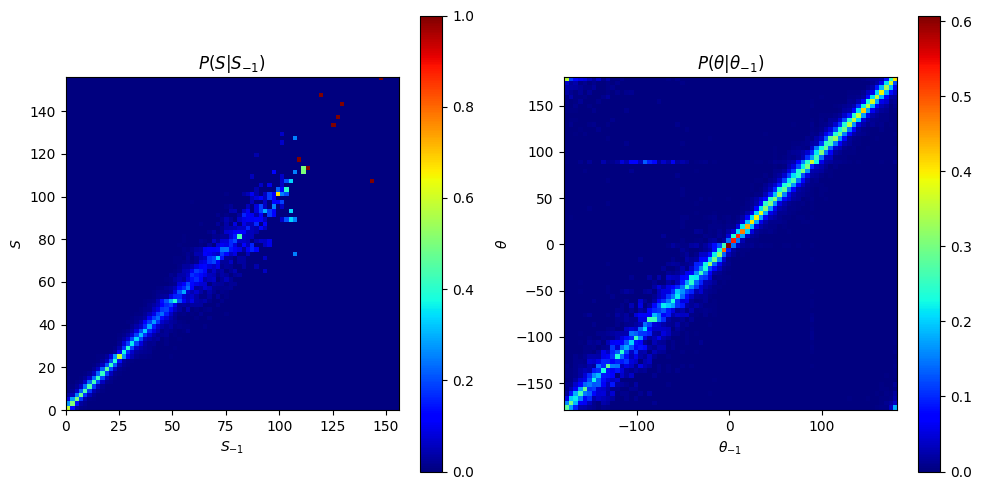

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].imshow(speed_trans, origin='lower', extent=[BINS['STORM_SPEED'][0], BINS['STORM_SPEED'][-1], BINS['STORM_SPEED'][0], BINS['STORM_SPEED'][-1]], cmap=plt.cm.jet)
axs[0].set_title("$P(S | S_{-1})$")
axs[0].set_xlabel('$S_{-1}$')
axs[0].set_ylabel('$S$')

im2 = axs[1].imshow(dir_trans, origin='lower', extent=[BINS['STORM_DIR'][0], BINS['STORM_DIR'][-1], BINS['STORM_DIR'][0], BINS['STORM_DIR'][-1]], cmap=plt.cm.jet)
axs[1].set_title("$P(\\theta | \\theta_{-1})$")
axs[1].set_xlabel('$\\theta_{-1}$')
axs[1].set_ylabel('$\\theta$')


fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
plt.tight_layout()
plt.show()

One notice that all values are clustered around the first diagonal: speed and direction are very smoothly
varying. Therefore, most of the space is wasted in this representation.

A more efficient representation would be to consider
the variations from the first diagonal, that is, take the derivatives:

Si l’on note $\dot{S}_i = S_i - S_{i-1}$, et $\dot{\theta}_i = \theta_i - \theta_{i-1}$, justifier que le vecteur d’état $(\dot{S}_i, \dot{\theta}_i)$ est équivalent à la seconde représentation, (et donc à la seconde), et justifier grâce à votre tracé de la question précédente, que ce choix de vecteur d’état est encore plus judicieux.

> Les deux représentations sont équivalentes, car on peut calculer $\dot{S}_i$ en fonction de $S_i$, et inversement (avec la condition initiale)

> Le choix du vecteur d'état $(\dot{S}_i, \dot{\theta}_i)$ est plus pertinent car elle utilise l'écart à la diagonale

<hr>

Hypothèse :

on peut oublier $t_i$
on peut considérer que qq soit la saison, le cyclone se comporte de la même manière

On peut essayer de simuler la trajectoire d'un cyclone

On peut supposer qu'un cyclone s'arrête quand la vitesse est < à une certaine valeur
(plus de détail dans l'article...)

<hr>

Soit $t_i$ le temps du point 𝑖. Dans un premier temps, justifier qualitativement (bonus : et quantitativement) que la dépendance entre $(\dot{S}_i, \dot{\theta}_i)$ peut être limitée aux variables en $i-1$ seulement, et qu’il est donc inutile de chercher de la dépendance entre les variables en $i-2$, $i-3$, etc.

> good balance between reproducing the tracks
smoothness and reducing the array size, and was chosen in this model. The results of the simulation will rule whether this
was a good approximation.

On supposera alors que la matrice de transition s’écrit $P(\dot{S}_i, \dot{\theta}_i | x_i, y_i, S_{i-1}, \theta_{i-1}, t_i)$
L’auteur de [2] suppose également l’indépendance entre $\dot{S}_i$ ̇et $\dot{\theta}_i$, de sorte que :

$P(\dot{S}_i, \dot{\theta}_i | x_i, y_i, S_{i-1}, \theta_{i-1}, t_i) \approx P(\dot{S}_i | x_i, y_i, S_{i-1}, t_i) \times P(\dot{\theta}_i | x_i, y_i, \theta_{i-1}, t_i)$.

Justifier cette approximation.

> Trop peu de données pour calculer tout ça.

>This allows a great reduction of the transition pdf array. This approximation is questionable: it is known that TC move
much faster when heading north-eastwards. However, it can be justified by the fact that a large part of the relation between
s and q might be explained by the relation both have to latitude. Results of the simulations will rule whether this is actually
a valid approximation.

On retiendra cette modélisation pour la matrice de transition. Pour simplifier,
on éliminera également la dépendance en $t_i$.

<hr>

# 4. Estimation des probabilités de transition

In [133]:
df['STORM_SPEED_DOT'] = df['STORM_SPEED'].diff()
df['STORM_DIR_DOT'] = df['STORM_DIR'].diff()

# On met STORM_DIR_DOT tq -180 < STORM_DIR_DOT <= 180
df.loc[df['STORM_DIR_DOT'] <= -180, 'STORM_DIR_DOT'] += 360
df.loc[df['STORM_DIR_DOT'] > 180, 'STORM_DIR_DOT'] -= 360

<Axes: xlabel='STORM_SPEED_DOT', ylabel='Count'>

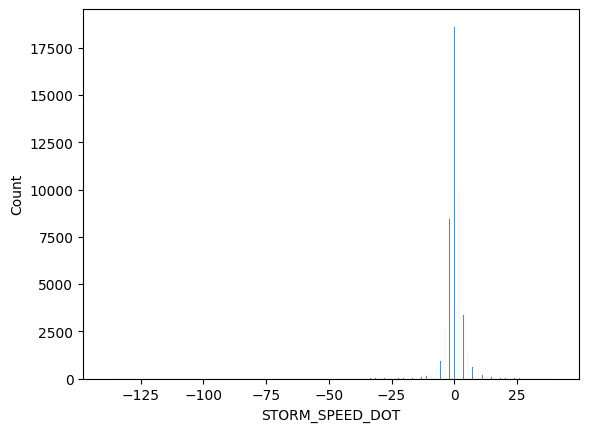

In [134]:
sns.histplot(df, x='STORM_SPEED_DOT')

<Axes: xlabel='STORM_DIR_DOT', ylabel='Count'>

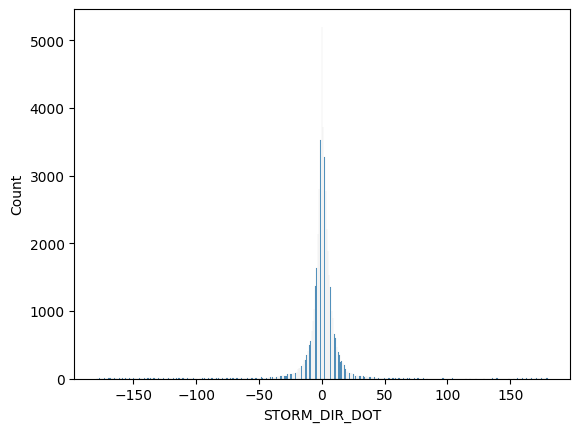

In [135]:
sns.histplot(df, x='STORM_DIR_DOT')

In [136]:
createBins('STORM_SPEED', 2)
createBins('STORM_DIR', 5)
createBins('STORM_SPEED_DOT', 1)
createBins('STORM_DIR_DOT', 3)

In [137]:
df

SID SEASON NUMBER BASIN SUBBASIN       NAME  \
0      1970138N12281   1970     43    NA       CS       ALMA   
1      1970138N12281   1970     43    NA       CS       ALMA   
2      1970138N12281   1970     43    NA       CS       ALMA   
3      1970138N12281   1970     43    NA       CS       ALMA   
4      1970138N12281   1970     43    NA       CS       ALMA   
...              ...    ...    ...   ...      ...        ...   
48350  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48351  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48352  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48353  2023319N11282   2023     80    NA       CS  NOT_NAMED   
48354  2023319N11282   2023     80    NA       CS  NOT_NAMED   

                 ISO_TIME NATURE      LAT      LON  ... STORM_DIR  \
0     1970-05-17 18:00:00     TS  11.5000 -79.0000  ...        47   
1     1970-05-17 21:00:00     TS  11.6475 -79.1400  ...        46   
2     1970-05-18 00:00:00     TS  11.8000 -79.3000  ...        42   
3     1970-05-18 03:00:00     TS  11.9575 -79.4925  ...        38   
4     1970-05-18 06:00:00     TS  12.1000 -79.7000  ...        31   
...                   ...    ...      ...      ...  ...       ...   
48350 2023-11-17 12:00:00     NR  17.0364 -79.8000  ...       139   
48351 2023-11-17 15:00:00     NR  17.4991 -79.1718  ...       142   
48352 2023-11-17 18:00:00     NR  18.0000 -78.5000  ...       139   
48353 2023-11-17 21:00:00     NR  18.6166 -77.8437  ...       133   
48354 2023-11-18 00:00:00     NR  19.3000 -77.2000  ...       132   

            TIME_DIFF LAT_bin LON_bin STORM_SPEED_bin STORM_DIR_bin  \
0                 NaT       0       5               3            45   
1     0 days 03:00:00       0       5               3            44   
2     0 days 03:00:00       0       5               4            44   
3     0 days 03:00:00       0       5               4            43   
4     0 days 03:00:00       1       5               4            41   
...               ...     ...     ...             ...           ...   
48350 0 days 03:00:00       2       5              13            63   
48351 0 days 03:00:00       2       5              14            64   
48352 0 days 03:00:00       2       5              15            63   
48353 0 days 03:00:00       2       5              16            62   
48354 0 days 03:00:00       2       6              16            62   

      STORM_SPEED_DOT STORM_DIR_DOT STORM_SPEED_DOT_bin STORM_DIR_DOT_bin  
0                 NaN           NaN                 NaN               NaN  
1               0.000          -1.0                 138                59  
2               1.852          -4.0                 140                58  
3               0.000          -4.0                 138                58  
4               0.000          -7.0                 138                57  
...               ...           ...                 ...               ...  
48350           3.704           3.0                 142                60  
48351           1.852           3.0                 140                60  
48352           1.852          -3.0                 140                58  
48353           1.852          -6.0                 140                57  
48354           0.000          -1.0                 138                59  

[48355 rows x 172 columns]

In [138]:
# On ajoute des nouvelles colonnes, qui contiennent la valeur de la ligne juste avant
df_only3h = df.copy()
df_only3h['STORM_SPEED_bin_before'] = df_only3h['STORM_SPEED_bin'].shift(1)
df_only3h['STORM_DIR_bin_before'] = df_only3h['STORM_DIR_bin'].shift(1)

# On ne garde que les lignes où TIME_DIFF == 3 heures, ce qui est le cas ssi la différence de temps est de 3 heures ET le SID est identique, par construction de TIME_DIFF
df_only3h = df_only3h[df_only3h['TIME_DIFF'] == pd.Timedelta(hours=3)]

# On enlève éventuellement les valeurs vides
df_tuples = df_only3h[['STORM_SPEED_DOT_bin', 'LAT_bin', 'LON_bin', 'STORM_SPEED_bin_before']]
df_tuples = df_tuples.dropna()

# On compte toutes les paires de valeurs présentes
df_N_S = df_tuples.groupby(['STORM_SPEED_DOT_bin', 'LAT_bin', 'LON_bin', 'STORM_SPEED_bin_before']).size().reset_index(name='Count')
# On utilise la fonction pivot de pandas qui créé un tableau à partir de ces paires
df_N_S = df_N_S[df_N_S['Count'] > 0]

df_N_S

STORM_SPEED_DOT_bin LAT_bin LON_bin STORM_SPEED_bin_before  Count
2625611                 103       7      11                     53      1
2625629                 103       7      11                     71      1
2732753                 107      10      10                     23      1
2779801                 109       8      13                     37      1
2781739                 109       9      13                     25      1
...                     ...     ...     ...                    ...    ...
4222621                 166       7      11                     13      1
4272962                 168       7       6                     44      1
4319971                 170       5       9                     19      1
4320277                 170       5      13                     13      1
4447043                 175       5      13                     29      1

[13986 rows x 5 columns]

In [139]:
# On enlève éventuellement les valeurs vides
df_tuples = df_only3h[['STORM_DIR_DOT_bin', 'LAT_bin', 'LON_bin', 'STORM_DIR_bin_before']]
df_tuples = df_tuples.dropna()


# On compte toutes les paires de valeurs présentes
df_N_Dir = df_tuples.groupby(['STORM_DIR_DOT_bin', 'LAT_bin','LON_bin', 'STORM_DIR_bin_before']).size().reset_index(name='Count')
# On utilise la fonction pivot de pandas qui créé un tableau à partir de ces paires
df_N_Dir = df_N_Dir[df_N_Dir['Count'] > 0]

df_N_Dir

STORM_DIR_DOT_bin LAT_bin LON_bin STORM_DIR_bin_before  Count
3833                    0       2       3                   17      1
7397                    0       4       2                   53      1
7430                    0       4       3                   14      1
7505                    0       4       4                   17      1
7872                    0       4       9                   24      1
...                   ...     ...     ...                  ...    ...
2794193               119       5       8                   17      1
2794409               119       5      11                   17      1
2795885               119       6       6                   53      1
2796389               119       6      13                   53      1
2796533               119       6      15                   53      1

[22886 rows x 5 columns]

In [140]:
nbPoss = 1
for name in ['STORM_DIR_DOT', 'LAT', 'LON', 'STORM_DIR']:
    nbPoss *= len(BINS[name])-1
nbPoss

2808000

Parmi toutes ces possibilités, il n'y a que 10724 tuples rencontrés !

Calcul de la matrice de transition pour l'accélération

In [141]:
speed_dot_trans = np.load("speed_dot_trans.npy")

In [142]:
speed_dot_trans = np.zeros((len(BINS['STORM_SPEED_DOT'])-1,len(BINS['LAT'])-1,len(BINS['LON'])-1,len(BINS['STORM_SPEED'])-1))
print(speed_dot_trans.shape)

nbTotal = (len(BINS['LAT'])-1)*(len(BINS['LON'])-1)*(len(BINS['STORM_SPEED'])-1)

for x_m in range(len(BINS['LAT'])-1):
    for y_l in range(len(BINS['LON'])-1):
        
        print(x_m,"/",(len(BINS['LAT'])-1), "|",y_l,"/",(len(BINS['LON'])-1),"|")
            
        for S_n_1 in range(len(BINS['STORM_SPEED'])-1):

            df_now = df_N_S[df_N_S['STORM_SPEED_bin_before'] == S_n_1]
            N = df_now['Count'].to_numpy()
            X_i = df_now['LAT_bin'].to_numpy()
            Y_j = df_now['LON_bin'].to_numpy()
            S_dot_k = df_now['STORM_SPEED_DOT_bin'].to_numpy()

            if(len(N) == 0):
                continue
            
            probs = []
            for S_dot_n in range(len(BINS['STORM_SPEED_DOT'])-1):

                inside_exp = -0.5 * ( ((x_m - X_i)**2 + (Y_j - y_l)**2) * RESOLUTIONS['LAT'] + ((S_dot_n - S_dot_k)**2)*RESOLUTIONS['STORM_SPEED_DOT'])

                prob = np.dot(N, np.exp(inside_exp))
                probs.append(prob)
            probs = np.array(probs)
            probs /= np.sum(probs)
            speed_dot_trans[:,x_m, y_l, S_n_1] = probs

(180, 13, 25, 78)
0 / 13 | 0 / 25 |
0 / 13 | 1 / 25 |
0 / 13 | 2 / 25 |
0 / 13 | 3 / 25 |


0 / 13 | 4 / 25 |
0 / 13 | 5 / 25 |
0 / 13 | 6 / 25 |
0 / 13 | 7 / 25 |
0 / 13 | 8 / 25 |
0 / 13 | 9 / 25 |
0 / 13 | 10 / 25 |
0 / 13 | 11 / 25 |
0 / 13 | 12 / 25 |
0 / 13 | 13 / 25 |
0 / 13 | 14 / 25 |
0 / 13 | 15 / 25 |
0 / 13 | 16 / 25 |
0 / 13 | 17 / 25 |
0 / 13 | 18 / 25 |
0 / 13 | 19 / 25 |
0 / 13 | 20 / 25 |
0 / 13 | 21 / 25 |
0 / 13 | 22 / 25 |
0 / 13 | 23 / 25 |
0 / 13 | 24 / 25 |
1 / 13 | 0 / 25 |
1 / 13 | 1 / 25 |
1 / 13 | 2 / 25 |
1 / 13 | 3 / 25 |
1 / 13 | 4 / 25 |
1 / 13 | 5 / 25 |
1 / 13 | 6 / 25 |
1 / 13 | 7 / 25 |
1 / 13 | 8 / 25 |
1 / 13 | 9 / 25 |
1 / 13 | 10 / 25 |
1 / 13 | 11 / 25 |
1 / 13 | 12 / 25 |
1 / 13 | 13 / 25 |
1 / 13 | 14 / 25 |
1 / 13 | 15 / 25 |
1 / 13 | 16 / 25 |
1 / 13 | 17 / 25 |
1 / 13 | 18 / 25 |
1 / 13 | 19 / 25 |
1 / 13 | 20 / 25 |
1 / 13 | 21 / 25 |
1 / 13 | 22 / 25 |
1 / 13 | 23 / 25 |
1 / 13 | 24 / 25 |
2 / 13 | 0 / 25 |
2 / 13 | 1 / 25 |
2 / 13 | 2 / 25 |
2 / 13 | 3 / 25 |
2 / 13 | 4 / 25 |
2 / 13 | 5 / 25 |
2 / 13 | 6 / 25 |
2 / 13 | 7 / 25 

Calcul de la matrice de transition pour la variation de direction

In [143]:
dir_dot_trans = np.load("dir_dot_trans.npy")

In [144]:
dir_dot_trans = np.zeros((len(BINS['STORM_DIR_DOT'])-1,len(BINS['LAT'])-1,len(BINS['LON'])-1,len(BINS['STORM_DIR'])-1))
print(dir_dot_trans.shape)

for x_m in range(len(BINS['LAT'])-1):
    for y_l in range(len(BINS['LON'])-1):
        
        print(x_m,"/",(len(BINS['LAT'])-1), "|",y_l,"/",(len(BINS['LON'])-1),"|")

        
        for T_n_1 in range(len(BINS['STORM_DIR'])-1):

            probs = []

            df_now = df_N_Dir[df_N_Dir['STORM_DIR_bin_before'] == T_n_1]
            N = df_now['Count'].to_numpy()
            X_i = df_now['LAT_bin'].to_numpy()
            Y_j = df_now['LON_bin'].to_numpy()
            T_dot_k = df_now['STORM_DIR_DOT_bin'].to_numpy()

            if(len(N) == 0):
                continue
            
            for T_dot_n in range(len(BINS['STORM_DIR_DOT'])-1):

                diff_TDOT = T_dot_n - T_dot_k
                diff_TDOT[diff_TDOT < -180] += 360
                diff_TDOT[diff_TDOT > 180] -= 360
                inside_exp = -0.5 * ( ((x_m - X_i)**2 + (Y_j - y_l)**2) * RESOLUTIONS['LAT'] + ((diff_TDOT)**2)*RESOLUTIONS['STORM_DIR_DOT'])

                prob = np.dot(N, np.exp(inside_exp))
                probs.append(prob)
            probs = np.array(probs)
            probs /= np.sum(probs)
            dir_dot_trans[:,x_m, y_l, T_n_1] = probs

(120, 13, 25, 72)
0 / 13 | 0 / 25 |
0 / 13 | 1 / 25 |
0 / 13 | 2 / 25 |


0 / 13 | 3 / 25 |
0 / 13 | 4 / 25 |
0 / 13 | 5 / 25 |
0 / 13 | 6 / 25 |
0 / 13 | 7 / 25 |
0 / 13 | 8 / 25 |
0 / 13 | 9 / 25 |
0 / 13 | 10 / 25 |
0 / 13 | 11 / 25 |
0 / 13 | 12 / 25 |
0 / 13 | 13 / 25 |
0 / 13 | 14 / 25 |
0 / 13 | 15 / 25 |
0 / 13 | 16 / 25 |
0 / 13 | 17 / 25 |
0 / 13 | 18 / 25 |
0 / 13 | 19 / 25 |
0 / 13 | 20 / 25 |
0 / 13 | 21 / 25 |
0 / 13 | 22 / 25 |
0 / 13 | 23 / 25 |
0 / 13 | 24 / 25 |
1 / 13 | 0 / 25 |
1 / 13 | 1 / 25 |
1 / 13 | 2 / 25 |
1 / 13 | 3 / 25 |
1 / 13 | 4 / 25 |
1 / 13 | 5 / 25 |
1 / 13 | 6 / 25 |
1 / 13 | 7 / 25 |
1 / 13 | 8 / 25 |
1 / 13 | 9 / 25 |
1 / 13 | 10 / 25 |
1 / 13 | 11 / 25 |
1 / 13 | 12 / 25 |
1 / 13 | 13 / 25 |
1 / 13 | 14 / 25 |
1 / 13 | 15 / 25 |
1 / 13 | 16 / 25 |
1 / 13 | 17 / 25 |
1 / 13 | 18 / 25 |
1 / 13 | 19 / 25 |
1 / 13 | 20 / 25 |
1 / 13 | 21 / 25 |
1 / 13 | 22 / 25 |
1 / 13 | 23 / 25 |
1 / 13 | 24 / 25 |
2 / 13 | 0 / 25 |
2 / 13 | 1 / 25 |
2 / 13 | 2 / 25 |
2 / 13 | 3 / 25 |
2 / 13 | 4 / 25 |
2 / 13 | 5 / 25 |
2 / 13 | 6 / 25 

In [145]:
np.save("dir_dot_trans", dir_dot_trans)
np.save("speed_dot_trans", speed_dot_trans)

<hr>

# Simulation

In [146]:
idx_begin = df.groupby('SID')['ISO_TIME'].idxmin()
df_begins = df.loc[idx_begin, ['SID', 'ISO_TIME', 'LAT', 'LON', 'STORM_SPEED', 'STORM_DIR']]

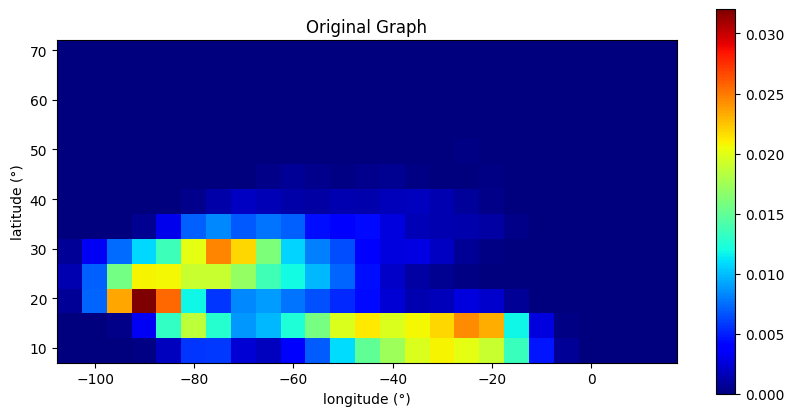

In [147]:
hist_begin = getHistKDE(df_begins['LAT'], df_begins['LON'], 0.2)
plotHist(hist_begin)

In [148]:
df[['LAT', 'LON', 'STORM_DIR', 'STORM_SPEED']].head(n=5)

LAT      LON  STORM_DIR  STORM_SPEED
0  11.5000 -79.0000         47        7.408
1  11.6475 -79.1400         46        7.408
2  11.8000 -79.3000         42        9.260
3  11.9575 -79.4925         38        9.260
4  12.1000 -79.7000         31        9.260

Pour nous aider dans la conversion, avec K une constante qui converti km en degré:

$\text{LON}_1 = \text{LON}_0 - cos(\theta) \times S \times \Delta \times K$

$\text{LAT}_1 = \text{LAT}_0 + sin(\theta) \times S \times \Delta \times K$

Théorique :
$\Delta \times K = 3 / 111.1$

Ici, on a en regardant les deux premières valeurs :

$\Delta \times K = 3 / 105$

In [149]:
def randomStart(hist):
    # Flatten the array
    flat_probs = hist.flatten()

    # Generate a random index based on the probabilities
    random_index = np.random.choice(len(flat_probs), p=flat_probs)

    # Convert the random index back to 2D indices
    lat_bin, lon_bin = np.unravel_index(random_index, hist.shape)

    lat_offset = np.random.random() * RESOLUTIONS['LAT']
    lon_offset = np.random.random() * RESOLUTIONS['LON']

    lat = BINS['LAT'][lat_bin] + lat_offset
    lon = BINS['LON'][lon_bin] + lon_offset

    #print("Choose", lat_bin, lon_bin, "with offset",lat_offset,lon_offset,"=>", lat,lon)

    return lat, lon

randomStart(hist_begin)

(7.172924685019073, -80.65017313072575)

In [150]:
df.groupby('SID').size()

SID
1970138N12281     75
1970200N19277     38
1970210N34285     33
1970212N18278     47
1970215N14342     33
                ... 
2023267N11338     67
2023280N09346     71
2023284N10343    151
2023294N10279     27
2023319N11282     27
Length: 915, dtype: int64

In [151]:
import math

def generateCyclone(hist_begin, speeds_begin, dirs_begin, speed_dot_trans, dir_dot_trans):

    trajectoire = []

    lat_begin, lon_begin = randomStart(hist_begin)
    speed_begin = np.random.choice(speeds_begin)
    dir_begin = np.random.choice(dirs_begin)

    trajectoire.append([lat_begin, lon_begin, speed_begin, dir_begin])

    while(len(trajectoire) < 80 and trajectoire[-1][2] > 0):
        lat, lon, speed, dir = trajectoire[-1]
        #print("===")
        #print("[OLD] lat =",lat, "lon =",lon,"speed =",speed,"dir =",dir)

        lat_nouv = lat + math.sin(dir * math.pi / 180) * speed * 3 / 105
        lon_nouv = lon - math.cos(dir * math.pi / 180) * speed * 3 / 105

        #print("[NOUV] lat =",lat_nouv,"lon =", lon_nouv)
        if lat_nouv > BINS['LAT'][-1] or lat_nouv < BINS['LAT'][0]:
            print("Break : lat_nouv out of bound", BINS['LAT'][0], BINS['LAT'][-1])
            return(trajectoire, False)
            lat_nouv = min(lat_nouv, BINS['LAT'][-1])
            lat_nouv = max(lat_nouv, BINS['LAT'][0])
        if lon_nouv > BINS['LON'][-1] or lon_nouv < BINS['LON'][0]:
            print("Break : lon_nouv out of bound", BINS['LON'][0], BINS['LON'][-1])
            return(trajectoire, False)
            lon_nouv = min(lon_nouv, BINS['LON'][-1])
            lon_nouv = max(lon_nouv, BINS['LON'][0])


        lat_nouv_bin = getAssignedBins([lat_nouv], BINS['LAT'])[0]
        lon_nouv_bin = getAssignedBins([lon_nouv], BINS['LON'])[0]
        speed_bin = getAssignedBins([speed], BINS['STORM_SPEED'])[0]
        dir_bin = getAssignedBins([dir], BINS['STORM_DIR'])[0]

        #print(lat_nouv_bin, lon_nouv_bin, speed_bin, dir_bin)

        if(np.sum(speed_dot_trans[:,lat_nouv_bin, lon_nouv_bin,speed_bin]) == 0):
            print("Break : speed no data")
            return(trajectoire, False)
        speed_dot_bin = np.random.choice(speed_dot_trans.shape[0], p=speed_dot_trans[:,lat_nouv_bin, lon_nouv_bin,speed_bin])
        speed_dot = BINS['STORM_SPEED_DOT'][speed_dot_bin] + np.random.random() * RESOLUTIONS['STORM_SPEED_DOT']
        speed_nouv = speed_dot + speed
        #print("[NOUV] speed_nouv =",speed_nouv)
        if speed_nouv > BINS['STORM_SPEED'][-1] or speed_nouv < BINS['STORM_SPEED'][0]:
            #print("Warning : speed_nouv out of bound", BINS['STORM_SPEED'][0], BINS['STORM_SPEED'][-1],",trying another solution")
            continue
            speed_nouv = min(speed_nouv, BINS['STORM_SPEED'][-1])
            speed_nouv = max(speed_nouv, BINS['STORM_SPEED'][0])

        if(np.sum(dir_dot_trans[:,lat_nouv_bin, lon_nouv_bin,dir_bin]) == 0):
            print("Break : dir no data")
            return(trajectoire, False)
        dir_dot_bin = np.random.choice(dir_dot_trans.shape[0], p=dir_dot_trans[:,lat_nouv_bin, lon_nouv_bin,dir_bin])
        dir_dot = BINS['STORM_DIR_DOT'][dir_dot_bin] + np.random.random() * RESOLUTIONS['STORM_DIR_DOT']
        dir_nouv = dir_dot + dir
        if dir_nouv > BINS['STORM_DIR'][-1]:
            dir_nouv -= 360
        if dir_nouv < BINS['STORM_DIR'][0]:
            dir_nouv += 360

        trajectoire.append([lat_nouv, lon_nouv, speed_nouv, dir_nouv])

    return (trajectoire, True)


In [152]:
SPEED_INIT = df_begins['STORM_SPEED'].to_numpy()
DIR_INIT = df_begins['STORM_DIR'].to_numpy()

In [153]:
BINS['STORM_DIR']

array([-179, -174, -169, -164, -159, -154, -149, -144, -139, -134, -129,
       -124, -119, -114, -109, -104,  -99,  -94,  -89,  -84,  -79,  -74,
        -69,  -64,  -59,  -54,  -49,  -44,  -39,  -34,  -29,  -24,  -19,
        -14,   -9,   -4,    1,    6,   11,   16,   21,   26,   31,   36,
         41,   46,   51,   56,   61,   66,   71,   76,   81,   86,   91,
         96,  101,  106,  111,  116,  121,  126,  131,  136,  141,  146,
        151,  156,  161,  166,  171,  176,  181])

In [154]:
trajectoire = generateCyclone(hist_begin, SPEED_INIT, DIR_INIT, speed_dot_trans, dir_dot_trans)

In [155]:
df.groupby("SID").size().head()

SID
1970138N12281    75
1970200N19277    38
1970210N34285    33
1970212N18278    47
1970215N14342    33
dtype: int64

In [156]:

def get_cmap(n, name='rainbow'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


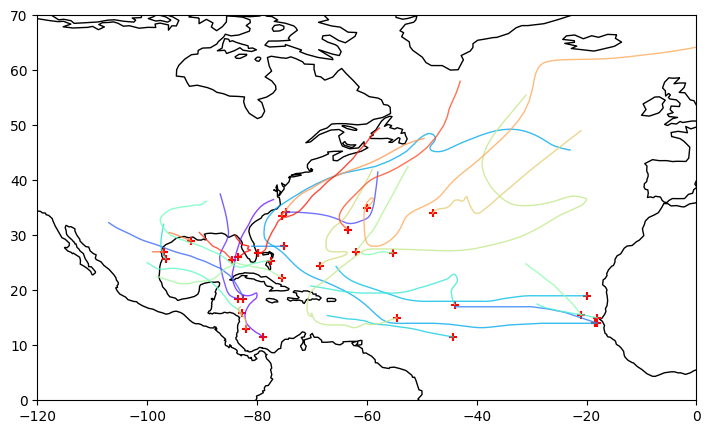

In [157]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
world = geopandas.read_file(get_path("naturalearth.land"))
world.plot(ax=axs, color='none', edgecolor='black')

nb = 0
cmap = get_cmap(31)
for sid in df["SID"].unique():
    nb +=1 
    if nb > 30:
        break
    axs.scatter(df[df['SID'] == sid]['LON'].to_numpy()[0], df[df['SID'] == sid]['LAT'].to_numpy()[0],c='r', marker="+")
    axs.plot(df[df['SID'] == sid]['LON'], df[df['SID'] == sid]['LAT'],linewidth=1.0, c=cmap(nb), alpha=0.8)

axs.set_xlim([-120, 0])
axs.set_ylim([0, 70])
plt.show()


Break : speed no data
Break : lat_nouv out of bound 7.0 72.0
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lat_nouv out of bound 7.0 72.0
Break : speed no data
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0
Break : lon_nouv out of bound -107.7 17.299999999999997
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0
Break : lat_nouv out of bound 7.0 72.0


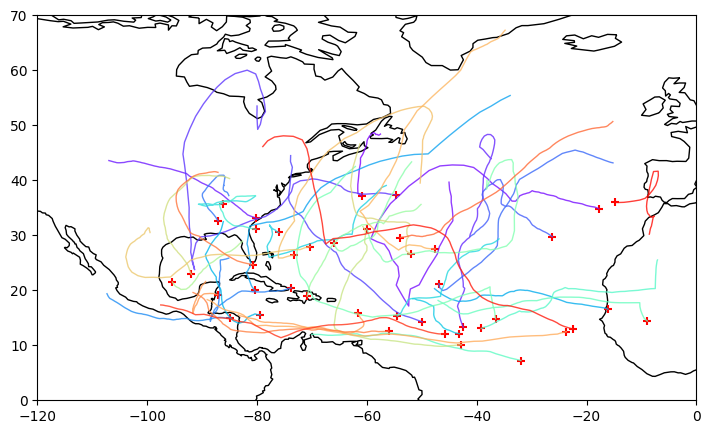

In [158]:


fig, axs = plt.subplots(1, 1, figsize=(10, 5))
world = geopandas.read_file(get_path("naturalearth.land"))
world.plot(ax=axs, color='none', edgecolor='black')

cmap = get_cmap(60)
for i in range(60):
    trajectoire, safe = generateCyclone(hist_begin, SPEED_INIT, DIR_INIT, speed_dot_trans, dir_dot_trans)
    color = cmap(i)
    if not safe:
        color='r'
        continue
    trajectoire = np.array(trajectoire)
    axs.scatter(trajectoire[0,1], trajectoire[0,0],c='r', marker="+")
    axs.plot(trajectoire[:,1], trajectoire[:,0],linewidth=1.0,c=color,alpha=0.8)

axs.set_xlim([-120, 0])
axs.set_ylim([0, 70])
plt.show()
